# EDA on bank marketing.

This project is based on analyzing a data set and predicting whether or not a bank advertisement campaing makes a user to deposit in the bank or not.
Now a days in the era of big data it is easy to focus only on particular mass of coustomers and mass campaing can be neglected.
Mass camping is very least efficient so it is good to know before the campaing abount the group of people the comapnies need to be more  focused on.


# Dataset Description

The dataset has been published by the Banco de Portugal and is available at [this link](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The dataset contains total of 21 columns, 20 are features and 1 is the label.

# Attribute information.

Input variables:
   ## bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   ## related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ## other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ## social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

So lets explore the data to find best features which will be good for training the model.

After just seeing all the atributes and there details we came to know that the call duration can be a great feature.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df=pd.read_csv('bank.csv')

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Lets check for null values.

In [36]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No null values are present.

In [38]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


We can drop the column day_of_week as it is of no use and one column will also be less.

In [40]:
df.drop('day',axis=1,inplace=True)

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,673,2,-1,0,unknown,yes


Now lets strat with our eda.


# Univariate analysis

## Age : Countplot

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


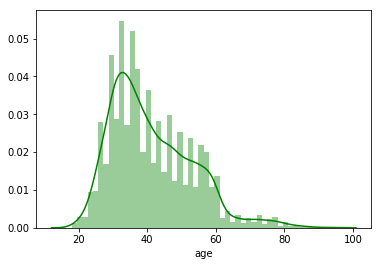

In [44]:
sns.distplot(df['age'],color='g')

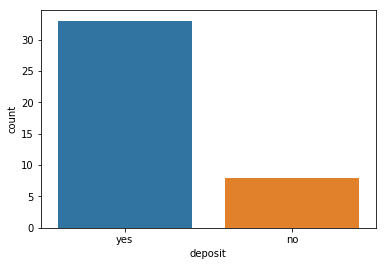

In [46]:
sns.countplot(df[df['age']<=20]['deposit'])

1. The minimun as maximum age are 18 and 95 respectively.
2. Outliers are present as the 75th percentile is around 48 and the maximum value os 98. 

## Pdays : Distplot

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


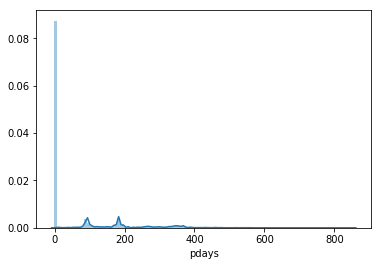

In [47]:
sns.distplot(df['pdays'],bins=100)

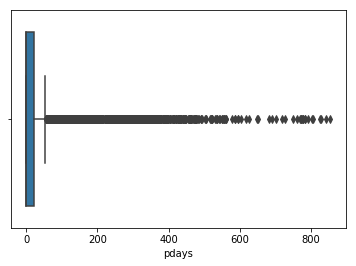

In [48]:
sns.boxplot(df['pdays'])

The min day is -1 and average is 854 with 75 percentile around 20. So large number of outliers present.
The meani is of 51 days which means a coustomer was contacted around 51 days before the present campaign.


## Duration : Distplot

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


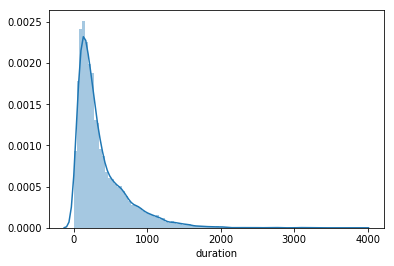

In [49]:
sns.distplot(df['duration'],bins=100)

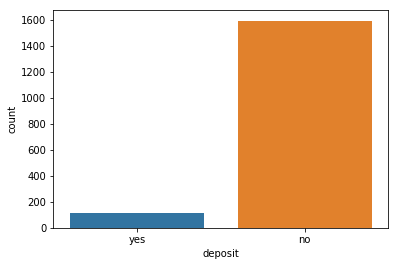

In [50]:
sns.countplot(df[df['duration']<100]['deposit'])

In [51]:
(df['duration']==0).sum()

0

The plot is rigth is skewed.
the minimum and maximum duration is 2 and 3881 in seconds respectively.
Outliers present as 75th percentile is near 496  and maximum is too high compare to that.


## Balance : Distplot

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


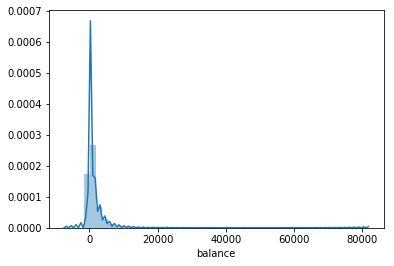

In [52]:
sns.distplot(df['balance'],bins=50)

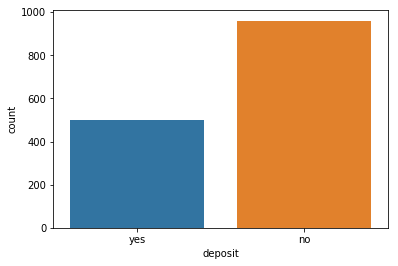

In [53]:
sns.countplot(df[df['balance']<=0]['deposit'])

A sharp edge with highly right skewed.
min and maximum balance is around -6847 abd 81204.
Outliers present.

## Campaign :Distplot

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


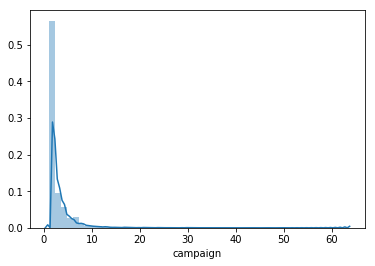

In [54]:
sns.distplot(df['campaign'])

1. The min and max is 1 and 63. 
2. Mean is 2.5
3. For 75% of data clients are contacted for 3 or more time.
4. Outliers present .

## Previous : Distplot

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


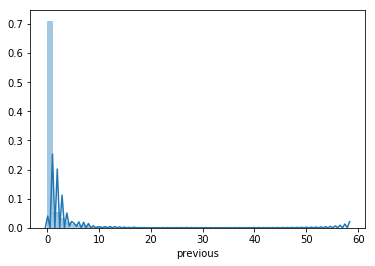

In [55]:
sns.distplot(df['previous'])

1. The values are not continous.
2. Avrerage number of time a client was contacted before this campaing is 0l.58.
3. The 75th percentile is 1 and the max is 58  so the outliers are present.

## Inference from univariate analysis.

From the plots above there are many factors which are affecting the scenario.
For the age, it is observed that the youth, 18-20 year of age are more likely to invest in the bank.
Now about the balance, there are many observation with negative balance. It is seen that a person with negative balance are not likely to invest in the bank. But is cannot be considered as too strong feature. There might be something which is also making people with negative balance to invest in the bank.

The most important feature i got is the duration feature.
Whenever the duration is less than 100 there are more chance of a not depositing in the bank.


But these observation was for particular values. so lest expore more to get more good features.



# Bivariate analysis.

In univariate we have seen that the age can be a good factor. Lets see a trend between age and deposit.

We have to make some changes in the data set. The data are very much scattered. The continous values like age, balance need to be converted into discrete values.

The string values also need to be converted into integer values.

In [56]:
df['deposit']=df['deposit'].map(dict(yes=1,no=0))

In [57]:
df['young']=0
df['adult']=0
df['old']=0

In [58]:
df.loc[(df['age']>=30) & (df['age']<=60),'adult' ]=1

In [59]:
df.loc[(df['age']>=60),'old']=1

In [60]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit,young,adult,old
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1042,1,-1,0,unknown,1,0,1,0
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1467,1,-1,0,unknown,1,0,1,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1389,1,-1,0,unknown,1,0,1,0
3,55,services,married,secondary,no,2476,yes,no,unknown,may,579,1,-1,0,unknown,1,0,1,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,673,2,-1,0,unknown,1,0,1,0


## Age and deposit: Count plot

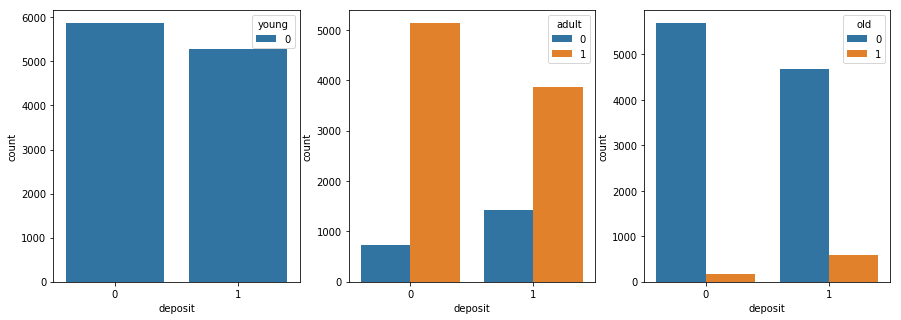

In [61]:

fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(15,5))
sns.countplot(df['deposit'],hue=df['young'],ax=ax1)
sns.countplot(df['deposit'],hue=df['adult'],ax=ax2)
sns.countplot(df['deposit'],hue=df['old'],ax=ax3)

After seeing this it is clear that the  client whose age is between 30 to 60 is more interested in the campaing. But still there are more features which can improve the advertisement.

So from now we will only be focused on the adult class people.

## Balance vs Deposit : Countplot

For this we nedd to group the balace data into 3 groups each for negative , zero and positive balance.

In [62]:
df['neg_bal']=0
df['zero_bal']=0
df['pos_bal']=0

In [63]:
df.loc[df['balance']<0,'neg_bal']=1
df.loc[df['balance']==0,'zero_bal']=1
df.loc[df['balance']>0,'pos_bal']=1

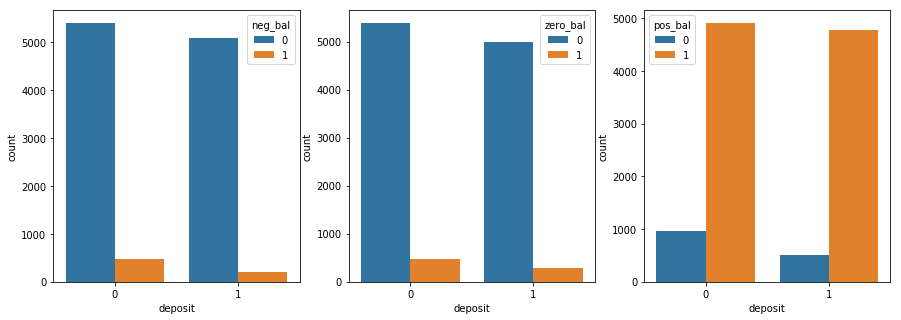

In [64]:

fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(15,5))
sns.countplot(df['deposit'],hue=df['neg_bal'],ax=ax1)
sns.countplot(df['deposit'],hue=df['zero_bal'],ax=ax2)
sns.countplot(df['deposit'],hue=df['pos_bal'],ax=ax3)

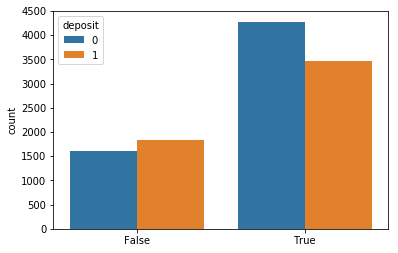

In [65]:
sns.countplot((df['adult']==1)  & (df['pos_bal']==1),hue=df['deposit'])

Now lets check the affect of personal features of a client like maratial status and education affect.


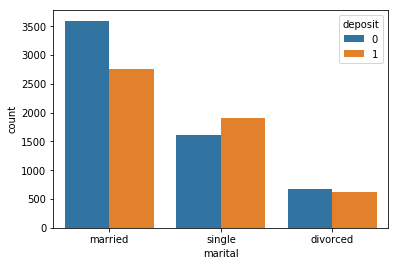

In [66]:
sns.countplot(df['marital'],hue=df['deposit'])

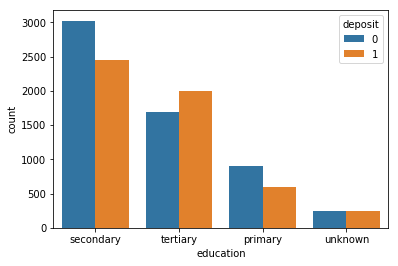

In [67]:
sns.countplot(df['education'],hue=df['deposit'])

married and single clients who have studied either till secondary or tertiary have invested more.


In [68]:
#df1=df[((df['marital']=='married') | (df['marital']=='single')) & ((df['education']=='secondary') | (df['education']=='tertiary')) ]


## Job vs deposit : Countplot

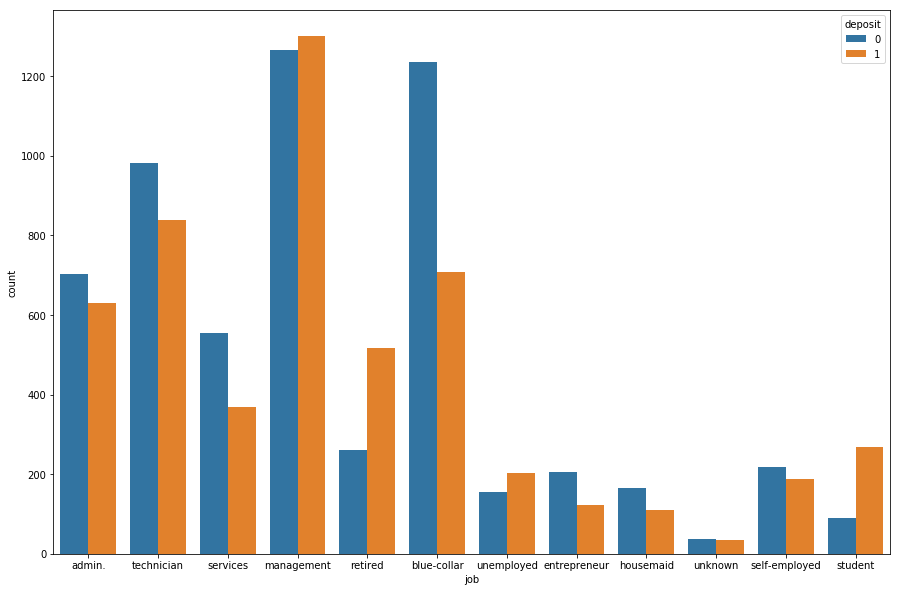

In [69]:
plt.figure(figsize=(15,10))
sns.countplot(df['job'],hue=df['deposit'])

## Campaing and prevoius vs deposit

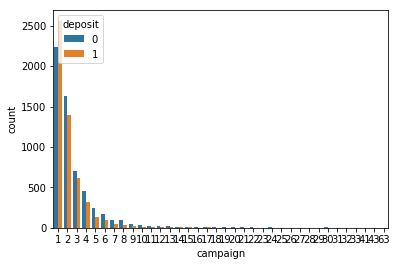

In [70]:
sns.countplot(df['campaign'],hue=df['deposit'])

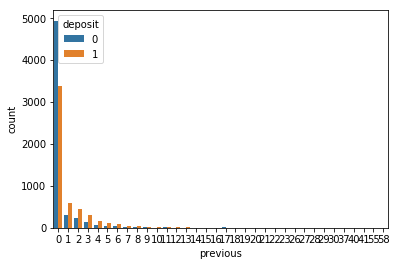

In [71]:
sns.countplot(df['previous'],hue=df['deposit'])

## previous vs campaign

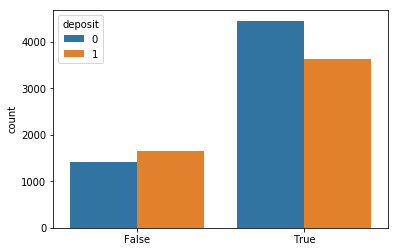

In [72]:
sns.countplot((df['previous']<=1) & (df['campaign']<=4),hue=df['deposit'])

## Inference from the bivariate analysis

From all the above plots, we can filter a group of people to whom the advertisement has affected the most.

Age: The adult  people are more likely to deposit based in the advertisement.

Balance: Clients having positive balance

Education and Maratial staus:  Married as well as single who have studied till secondary or primary are more focused.

Job: A group of people like (admin,technician,services,management,retired,bluecollar)

Previous as well as now contaced: clients who were contacted once and now they are contacted 2-4 times are more likey to deposit.

So lets a filtered dataset according to these conditions.

In [94]:
#df[((df['marital']=='married') | (df['marital']=='single')) & ((df['education']=='secondary') | (df['education']=='tertiary')) ]


In [98]:
df1=df[df['adult']==1]

In [104]:
df1=df1[df1['pos_bal']==1]

In [105]:
(df1['deposit']==1).sum()

3460